In [24]:
import os, sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive/Colab Notebooks")
sys.path.append("content/drive/My Drive/Colab Notebooks")

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.70      0.55      0.62        73
           1       0.70      0.73      0.71        55
           2       0.49      0.55      0.52        65
           3       0.70      0.75      0.72        68
           4       0.72      0.47      0.57        80
           5       0.64      0.54      0.59        72
           6       0.83      0.23      0.36        22
           7       0.00      0.00      0.00         2
           8       0.47      0.49      0.48        69
           9       0.71      0.79      0.75        78
          10       0.58      0.51      0.54        83
          11       0.26      0.12      0.17        73
          12       0.62      0.80      0.70        64
          13       0.55      0.49      0.52        95
          14       0.46      0.43      0.45        90
          15       0.68      0.68      0.68        91
          16       0.70      0.82      0.75        73
          17       0.47    

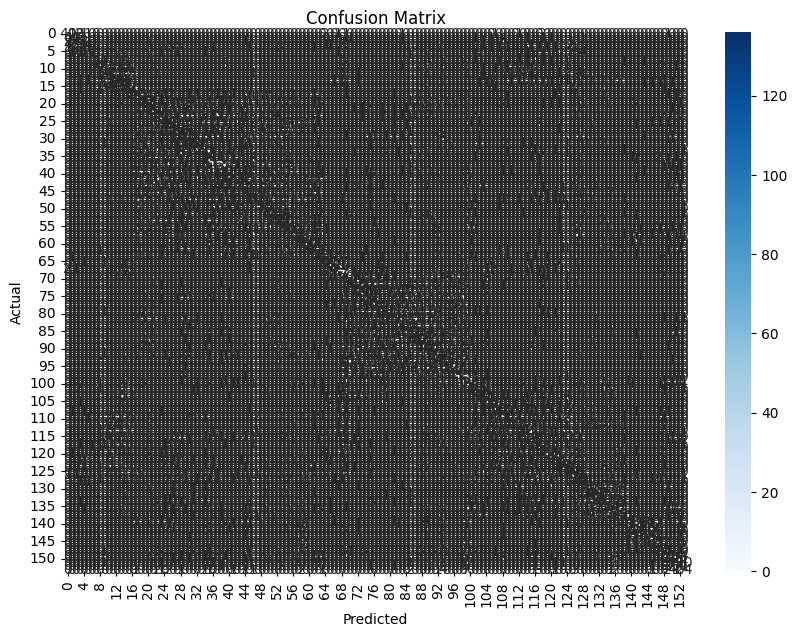

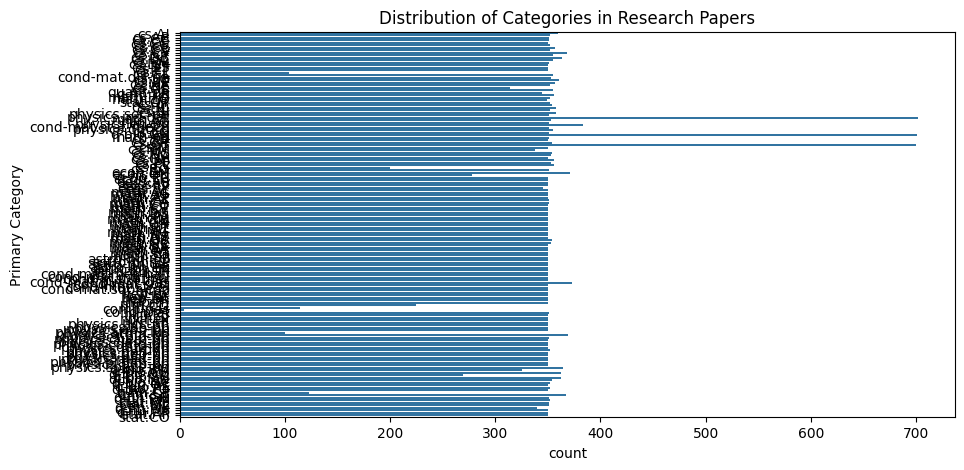

Top 10 important features:
gas: 2.8375629581086432
lensing: 2.8493475560006924
universe: 2.8788397206525076
cosmic: 3.131221441575108
radio: 3.422310081159378
redshift: 3.7011197700643423
dark: 4.883095824040321
galaxy: 4.891877388100067
cosmological: 4.997390698616794
galaxies: 6.034128887223071


In [28]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import re

# Step 3: Load the datasets
arxiv_data = pd.read_csv('arXiv-DataFrame.csv')

# Step 4: Data preprocessing
def preprocess_text_simple(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

if 'Summary' in arxiv_data.columns:
    arxiv_data['Summary'] = arxiv_data['Summary'].apply(preprocess_text_simple)
else:
    raise ValueError("The dataset does not contain a 'Summary' column")

# Step 5: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(arxiv_data['Summary'])
y = arxiv_data['Primary Category']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 6: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model, vectorizer, and label encoder
with open('research_paper_categorization_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Download the files (if in Google Colab)
from google.colab import files
files.download('research_paper_categorization_model.pkl')
files.download('vectorizer.pkl')
files.download('label_encoder.pkl')

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Visualizations
# Distribution of Categories
plt.figure(figsize=(10,5))
sns.countplot(y)
plt.title('Distribution of Categories in Research Papers')
plt.show()

# Most important features
feature_names = vectorizer.get_feature_names_out()
sorted_coef_index = model.coef_[0].argsort()
print("Top 10 important features:")
for i in sorted_coef_index[-10:]:
    print(f"{feature_names[i]}: {model.coef_[0][i]}")